In [ ]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17752, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 17752 (delta 62), reused 32 (delta 32), pack-reused 17651 (from 4)
Receiving objects: 100% (17752/17752), 17.11 MiB | 12.49 MiB/s, done.
Resolving deltas: 100% (12048/12048), done.


In [ ]:
%cd yolov5
# install dependencies as necessary
!pip install -r requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.3 MB/s eta 0:00:00
Setup complete. Using torch 2.9.0+cu126 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=594486d2-d27d-757f-204f-84fedd0d516d, pci_bus_id=0, pci_device_id=4, pci_domain_id=0, L2_cache_size=4MB)


In [ ]:
%cd /content/yolov5
!pip install -q roboflow==1.1.48

import roboflow

ROBOFLOW_API_KEY = "ohwhbRAa8oYuBz0X76Mi" # CHANGE THIS VALUE WITH YOUR OWN
rf = roboflow.Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.project("buoy-o3eym-duls0") # CHANGE THIS VALUE WITH YOUR OWN
dataset = project.version(1).download("yolov5") # change version

/content/yolov5
Exporting format yolov5pytorch in progress : 85.0%
Version export complete for yolov5pytorch format



Extracting Dataset Version Zip to buoy-1 in yolov5pytorch:: 100%|██████████| 1797/1797 [00:46<00:00, 38.70it/s] 


In [ ]:
# train yolov5s on custom data for 25 epochs
# time its performance
%%time
%cd /content/yolov5
!python train.py --img 416 --batch 16 --epochs 25 --data {dataset.location}/data.yaml --weights yolov5s.pt --name yolov5s_results --cache

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2025-12-03 18:12:07.507206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764785527.743221    4559 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764785527.801846    4559 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764785528.299519    4559 computation_placer.cc:177] computation placer already registered. Please

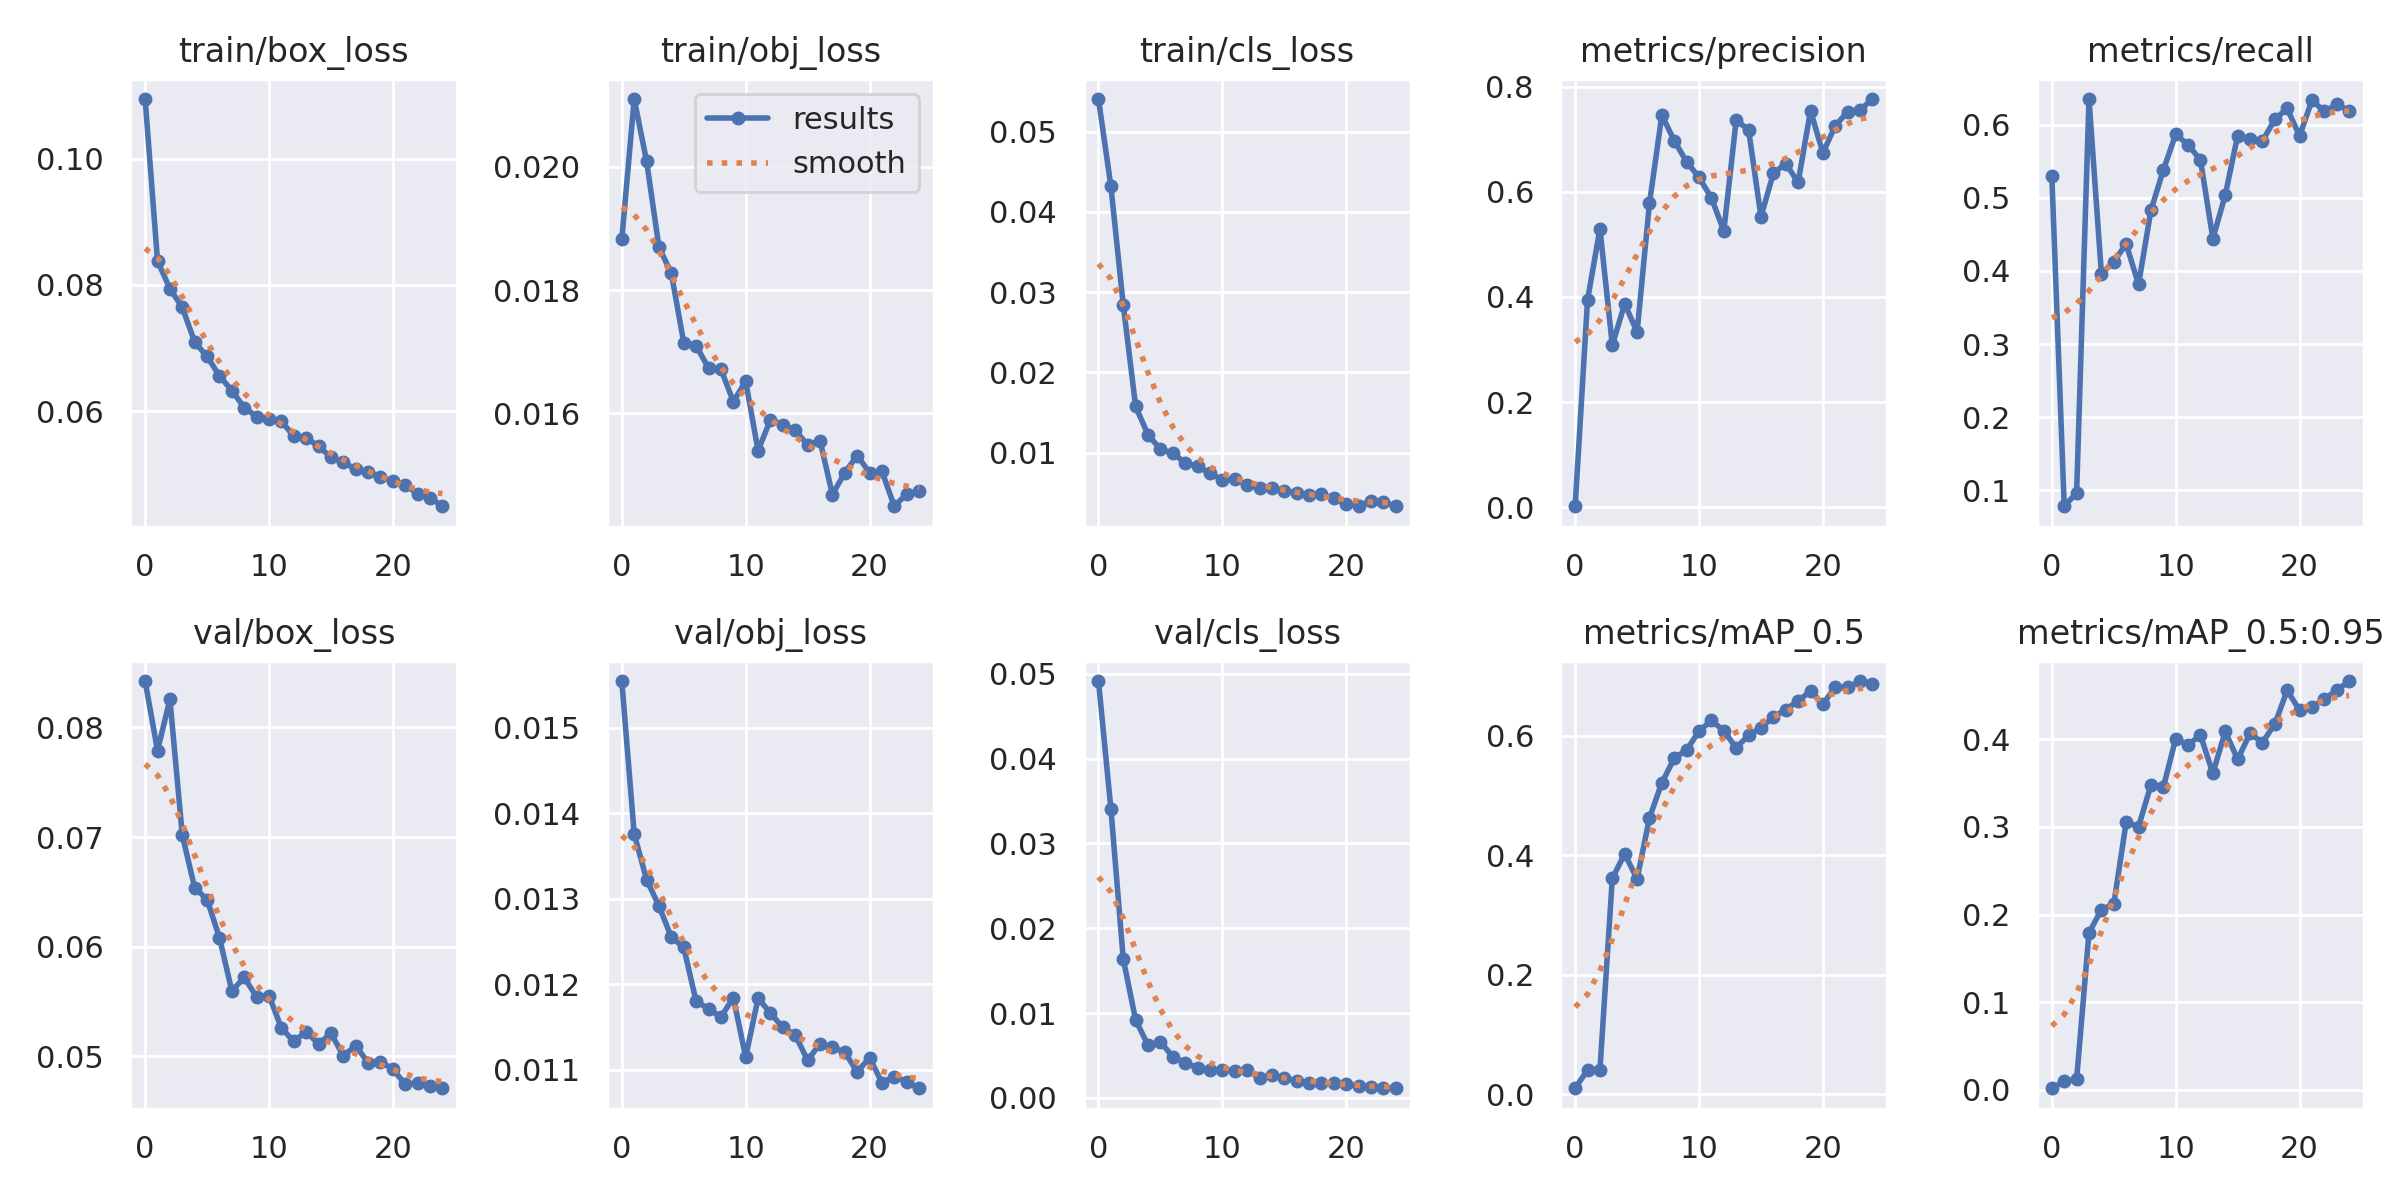

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

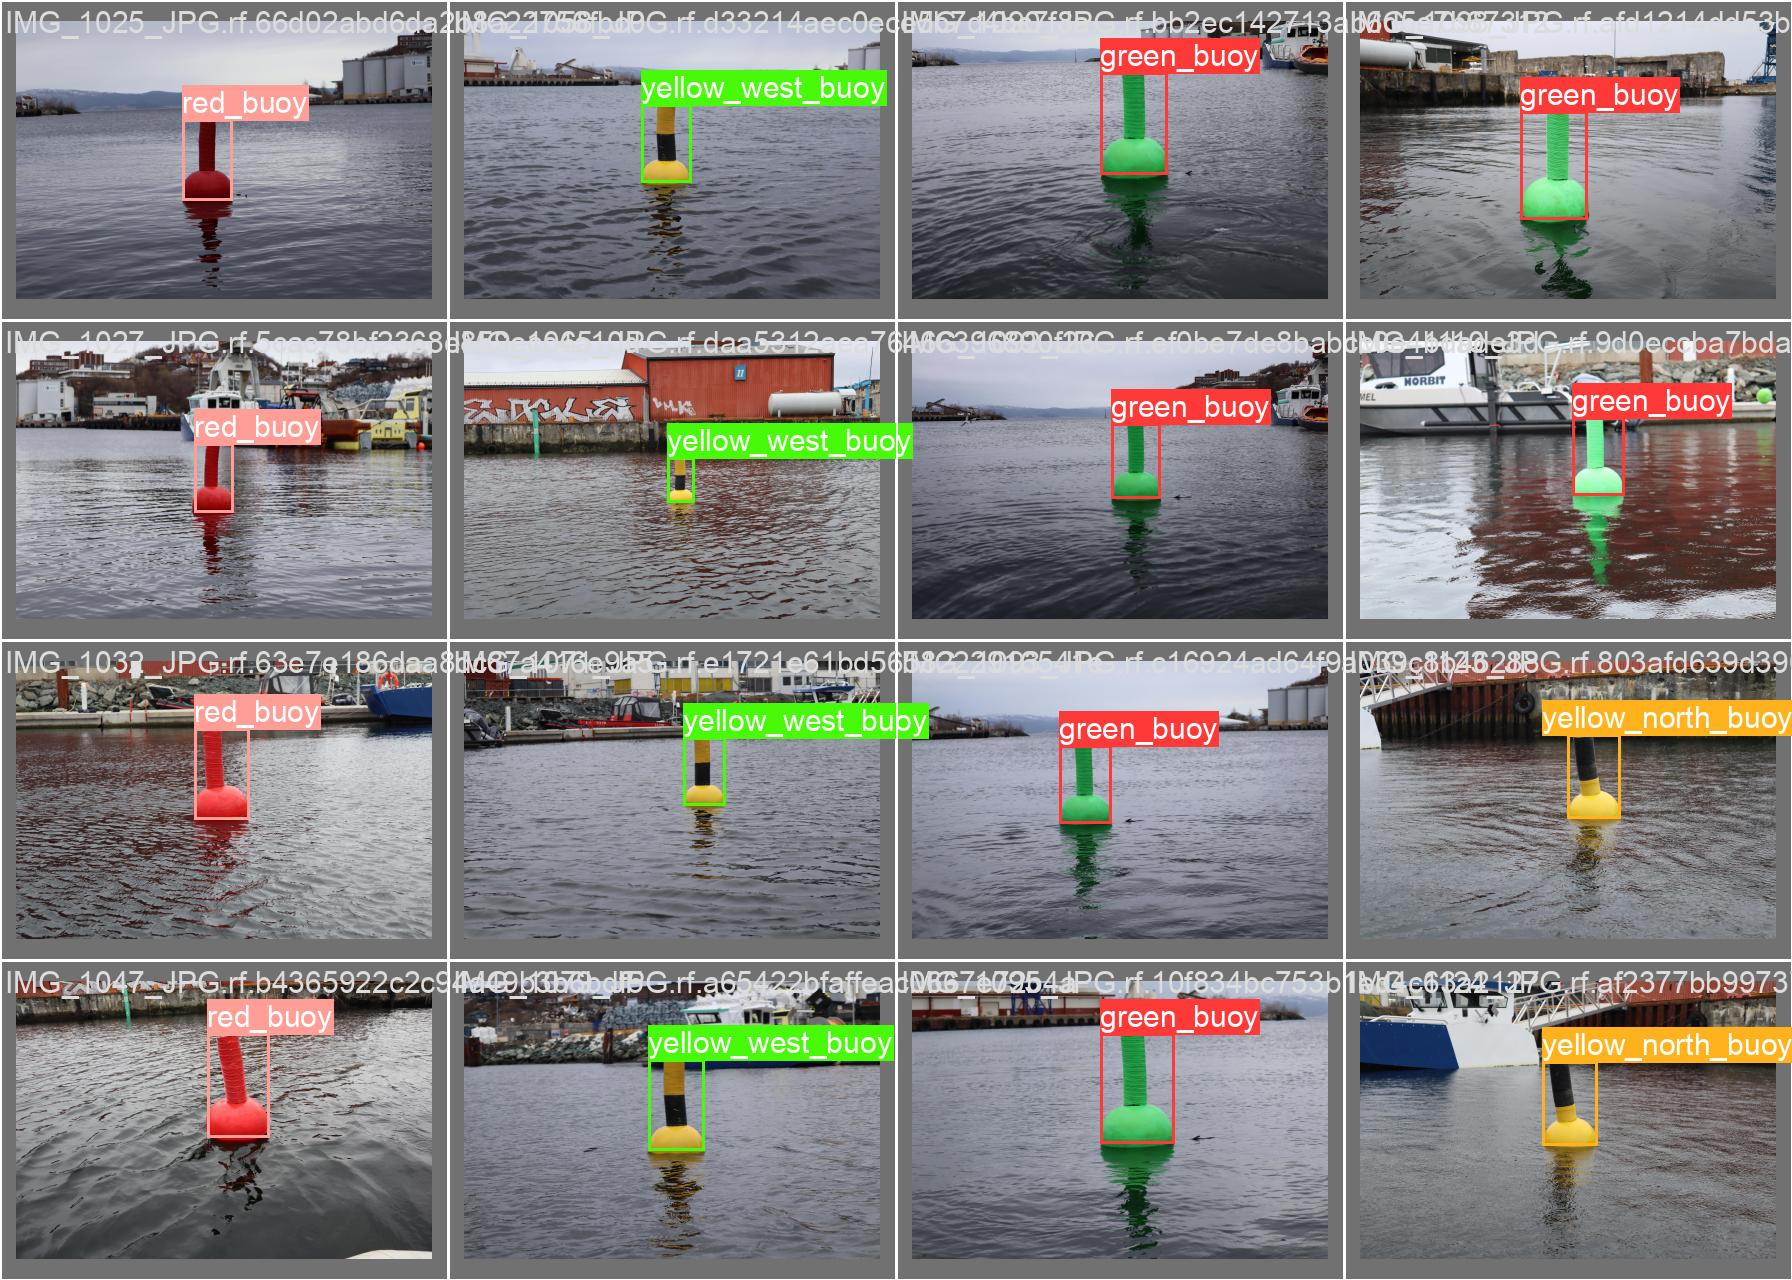

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=400)

GROUND TRUTH AUGMENTED TRAINING DATA:


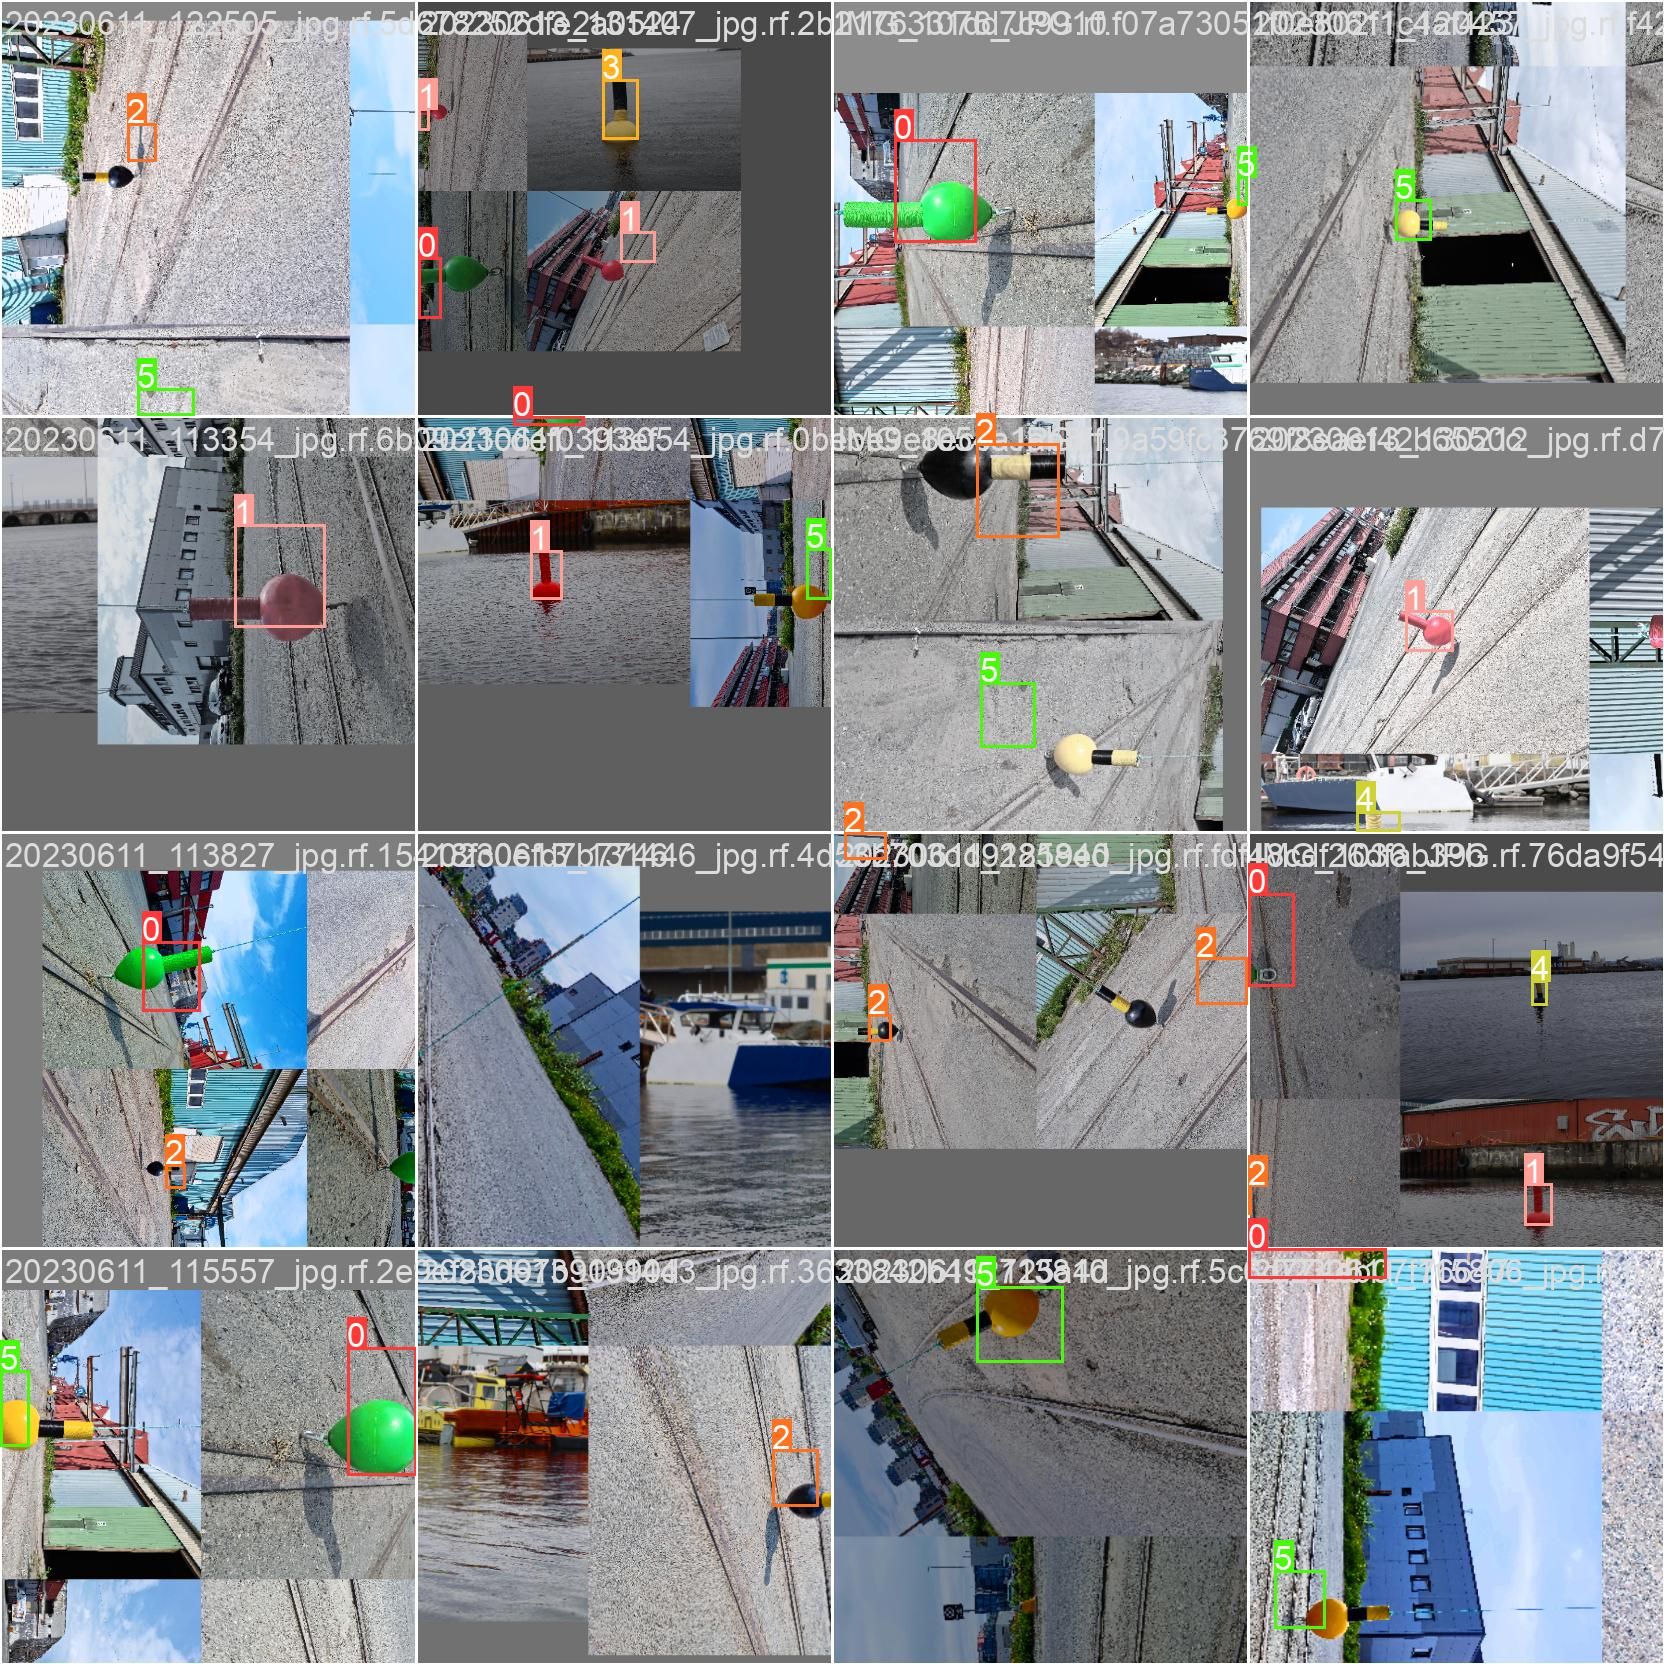

In [ ]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=400)

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
%cd /content/yolov5/
!python export.py --weights runs/train/yolov5s_results/weights/best.pt --include onnx

/content/yolov5
export: data=data/coco128.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-450-g781b9d57 Python-3.12.12 torch-2.9.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/yolov5s_results/weights/best.pt with output shape (1, 25200, 11) (13.7 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxscript'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 8 packages in 199ms
Prepared 3 packages in 1.21s
Installed 3 packages in 260ms
 + onnx==1.20.0
 + onnx-ir==0.1.12
 + onnxscript==0.5.7.d

In [ ]:
import torch
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load your trained model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/yolov5/runs/train/yolov5s_results/weights/best.pt', source='local')
model.conf = 0.4  # confidence threshold


YOLOv5 🚀 v7.0-450-g781b9d57 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
!python export.py --weights /content/yolov5/runs/train/yolov5s_results/weights/best.pt --include torchscript

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/yolov5s_results/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-450-g781b9d57 Python-3.12.12 torch-2.9.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/yolov5s_results/weights/best.pt with output shape (1, 25200, 11) (13.7 MB)

TorchScript: starting export with torch 2.9.0+cu126...
TorchScript: export success ✅ 2.4s, saved as /content/yolov5/runs/train/yolov5s_results/weights/best.torchscript (27.3 MB)

Export complete (3.3s)
Results saved to /content/yolov5/runs/train/yolov5s_results/weights